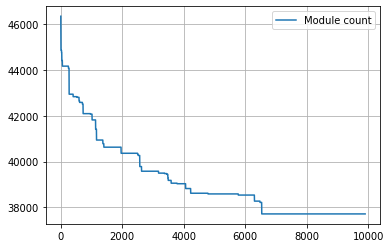

100%|██████████| 10000/10000 [10:38<00:00, 15.66it/s]


In [1]:
from Population import Population
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display

population = Population(100, 0)
iterCount = 10000

moduleCount = list()

for x, y in tqdm(population.evolution(0.1, 0.8, iterCount, 1), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output(wait=True)
        plt.plot(moduleCount, label='Module count')
        plt.legend()
        plt.grid()
        plt.show()